In [20]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
data = pd.read_csv("./Data/water_potability.csv")


'''
data.dropna(axis=0, inplace = True)


n = abs(data[data["Potability"] == 0].shape[0]- data[data["Potability"] == 1].shape[0])
data_filtered = data[data["Potability"]==0];
data_filtered2 = data[data["Potability"] == 1]
data_filtered = data.drop(index=data_filtered.index[:n], axis=0, inplace=True)
frames = [data_filtered,data_filtered2]

data_equal = pd.concat(frames)

'''


#try changing data to data_equal for some models --> see if it gets better results -Annya

# Try with imputed data (try with mean, mode (most common value), etc.)
# GridSearchCV
print(data_equal)

             ph    Hardness        Solids  Chloramines     Sulfate  \
250    9.445130  145.805402  13168.529156     9.444471  310.583374   
251    9.024845  128.096691  19859.676476     8.016423  300.150377   
253    6.800119  242.008082  39143.403329     9.501695  187.170714   
254    7.174135  203.408935  20401.102461     7.681806  287.085679   
255    7.657991  236.960889  14245.789121     6.289065  373.165363   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
250     592.659021        8.606397        77.577460   3.875165           1  
251  

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
"""params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,param_grid = params,scoring = 'accuracy', cv = 5, verbose = 1,n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_params_)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
print(grid_kn.score(x_test, y_test)) """
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}
grid_kn = GridSearchCV(estimator = kn,param_grid = params,scoring = 'accuracy', verbose = 1,n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_params_)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
print(grid_kn.score(x_test, y_test)) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'n_neighbors': 1}
1.0


In [36]:
predictions = grid_kn.predict(x_test)

In [41]:
y_test.value_counts()

1    203
Name: Potability, dtype: int64

In [51]:
target = data_equal["Potability"]
features = data_equal.drop(columns = ["Potability"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [3]:
print(target.shape[0])
print(features.shape[0])

811
811


In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

my_KNN_model = GridSearchCV(KNN(), param_grid = parameters)
my_KNN_model.fit(x_train, y_train)
my_KNN_model.best_params_

{'n_neighbors': 1}

0.0
1.0
1.0


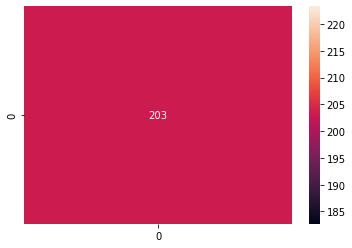

In [52]:
KNN_model_2 = KNN(n_neighbors = 12)
KNN_model_2.fit(x_train, y_train)
from sklearn.metrics import f1_score


y_hat = KNN_model_2.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)
print(mean_squared_error)
print(KNN_model_2.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt ='g')
score = f1_score(y_test, y_hat, average='binary')
print(score)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_param = {
    "n_estimators": [100,120,140,160,180,200],
    "max_features": ["log2", "sqrt", None],
    "min_samples_split": [10,20,30,40]
}

rfc_test = GridSearchCV(RandomForestClassifier(), param_grid = rfc_param).fit(x_train,y_train)
rfc_test.best_params_

{'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}

0.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       203

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



<AxesSubplot:>

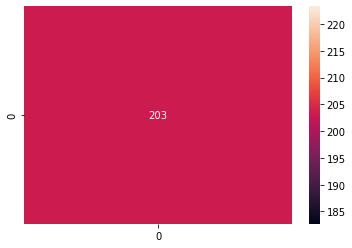

In [7]:
rfc_model = RandomForestClassifier(max_features=None,
                                   min_samples_split=20,
                                   n_estimators=140).fit(x_train, y_train)
y_hat_rfc = rfc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_rfc)**2)) / len(y_test)
print(mean_squared_error)
print(rfc_model.score(x_test, y_test))
print(classification_report(y_test, y_hat_rfc))
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot=True, fmt='g')

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc_param = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [20,30,40,50,60,70]
}

dtc_test = GridSearchCV(DecisionTreeClassifier(), param_grid = dtc_param).fit(x_train,y_train)
dtc_test.best_params_

{'max_depth': 1, 'max_leaf_nodes': 20}

0.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       203

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



<AxesSubplot:>

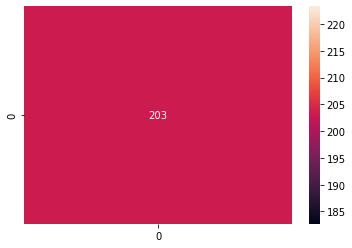

In [50]:


dtc_model = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 70).fit(x_train,y_train)
y_hat_dtc = dtc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_dtc)**2))/len(y_test)
print(mean_squared_error)
print(dtc_model.score(x_test,y_test))
print(classification_report(y_test, y_hat_dtc))
sns.heatmap(confusion_matrix(y_test, y_hat_dtc), annot = True, fmt ='g')

In [10]:
# classification_report(y_test, y_hat_dtc, output_dict = True)
print(data[data["Potability"] == 0].shape[0])
print(data[data["Potability"] == 1].shape[0])

811
811


In [11]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [25]:
data = pd.read_csv("./Data/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [66]:
# Calculate value to impute with
df = data

df['ph'].fillna(int(df['ph'].mean()), inplace=True)

df['Sulfate'].fillna(int(df['Sulfate'].mean()), inplace=True)

df['Trihalomethanes'].fillna(int(df['Trihalomethanes'].mean()), inplace=True)

data.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.000000,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [69]:
df['ph'].fillna(df['ph'].replace(7.0), inplace=True)

df['Sulfate'].fillna(df['Sulfate'].replace(333.0), inplace=True)

df['Trihalomethanes'].fillna(df['Trihalomethanes'].replace(66.0), inplace=True)

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
# D = data.values
# x = D[:,0:4]
# y = D[:, 4]
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)

In [49]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:

# model = SVC()
# model.fit(X_train, Y_train)
# #mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)

In [15]:
# Y_pred = model.predict(X_test)
# print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
# print("Precision:", metrics.precision_score(Y_test, Y_pred))
# print("Recall:", metrics.recall_score(Y_test, Y_pred))
# print("Mean-Squared-Error:", mean_squared_error)